In [1]:
# fixing directory to root of project
import git
import os
import sys

repo = git.Repo(".", search_parent_directories=True)
os.chdir(repo.working_tree_dir)
sys.path.append(repo.working_tree_dir)

import pandas as pd
import numpy as np
from scipy.stats import uniform, loguniform, randint
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer

from src.utils.utils import int_loguniform
from src.modelling.pipeline.ml_pipeline import (
    preprocess_features,
    preprocess_target,
    FilterFeatures,
    model_pipeline,
    )


from sklearn.datasets import load_iris


d:\Users\sean.ogara\.conda\envs\auto-ml\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
iris = load_iris()

iris_data = pd.DataFrame(np.concatenate((iris.data, np.array([iris.target]).T), axis=1), columns=iris.feature_names + ['target'])
iris_data = iris_data[iris_data["target"].isin([0, 1.0])]
iris_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,1.0
96,5.7,2.9,4.2,1.3,1.0
97,6.2,2.9,4.3,1.3,1.0
98,5.1,2.5,3.0,1.1,1.0


In [3]:
# set the pipeline code running with a logistic regression and a decision tree classifier model
# see where it breaks, remove those bits of code temporarily and get the core pipeline working
# build some logic into the broken bits of the code to run differently when a classification task is running, get the code working agian with all bits added back in
# code the classification logic

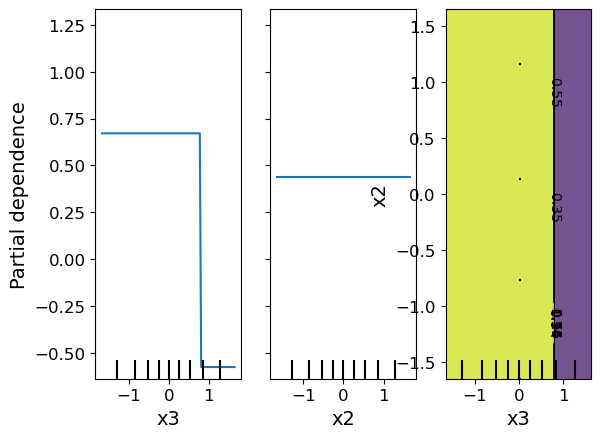

In [4]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.inspection import PartialDependenceDisplay
from sklearn.datasets import make_hastie_10_2
import matplotlib.pyplot as plt

X, y = make_hastie_10_2(random_state=0)


iris = load_iris()
mc_clf = GradientBoostingClassifier(n_estimators=10,
    max_depth=1).fit(iris.data, iris.target)
features = [3, 2, (3, 2)]
PartialDependenceDisplay.from_estimator(mc_clf, X, features, target=0)
plt.show()

In [5]:
# target variables
target_var_list = ["target"]
# drop any unecessary variables from the model. In this case, we are dropping the geographical identifier.
drop_variables = []
# model dictionary and hyperparameter search space
model_param_dict = {
    LogisticRegression(): {},
    RandomForestClassifier(): {}
}
# optional controls:
# select features list - use to subset specific features of interest, if blank it will use all features.
# change feature_filter__filter_features hyperparam when using this
select_features_list = []
# optional - user specified model for evaluation plots. e.g. user_model = "Lasso"
# if left blank out the best performing model will be used for the evaluation plots
user_model = ""
# shortened feature name label for evaluation plots
col_labels = {}

# run pipeline for all models
for target_var in target_var_list:
    # pre-processing
    # drop cols, convert to set to drop unique cols only
    cols_to_drop = list(set([target_var] + drop_variables))
    features = preprocess_features(df=iris_data, cols_to_drop=cols_to_drop)
    target_df = preprocess_target(df=iris_data, target_col=target_var)

    # run model pipeline
    model_pipeline(
        model_param_dict=model_param_dict,
        target_var=target_var,
        target_df=target_df,
        feature_df=features,
        id_col="",
        original_df=iris_data,
        output_path="outputs",
        output_label="classification_demo",
        col_label_map=col_labels,
        user_evaluation_model=user_model,
    )


2025/04/07 14:48:53 WARNING mlflow.utils.autologging_utils: MLflow sklearn autologging is known to be compatible with 0.24.1 <= scikit-learn <= 1.5.1, but the installed version is 1.6.1. If you encounter errors during autologging, try upgrading / downgrading scikit-learn to a compatible version, or try upgrading MLflow.


Number of cores available for parallel processing: 4
TunedThresholdClassifierCV


d:\Users\sean.ogara\.conda\envs\auto-ml\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 1 is smaller than n_iter=150. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


2025/04/07 14:49:23 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "d:\Users\sean.ogara\.conda\envs\auto-ml\Lib\site-packages\mlflow\sklearn\utils.py:808: UserWarning: Top 50 child runs will be created based on ordering in rank_test_f1 column.  You can choose not to limit the number of child runs created by setting `max_tuning_runs=None`."
2025/04/07 14:49:23 INFO mlflow.sklearn.utils: Logging the 50 best runs, no runs will be omitted.
2025/04/07 14:49:24 WARNING mlflow.utils.autologging_utils: MLflow sklearn autologging is known to be compatible with 0.24.1 <= scikit-learn <= 1.5.1, but the installed version is 1.6.1. If you encounter errors during autologging, try upgrading / downgrading scikit-learn to a compatible version, or try upgrading MLflow.


best threshold: 0.15522635513375632
Creating classification evaluation plots
TunedThresholdClassifierCV


d:\Users\sean.ogara\.conda\envs\auto-ml\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 1 is smaller than n_iter=150. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


2025/04/07 14:49:45 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "d:\Users\sean.ogara\.conda\envs\auto-ml\Lib\site-packages\mlflow\sklearn\utils.py:808: UserWarning: Top 50 child runs will be created based on ordering in rank_test_f1 column.  You can choose not to limit the number of child runs created by setting `max_tuning_runs=None`."
2025/04/07 14:49:45 INFO mlflow.sklearn.utils: Logging the 50 best runs, no runs will be omitted.


best threshold: 0.020202020202020204
Creating classification evaluation plots
